In [1]:
import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
# requirements : 
#     recommended platform : ubuntu
#     python == 3.7
#     pip install pandas
#     pip install numpy
#     pip install sklearn
#     pip install seaborn
#     pip install matplotlib
%matplotlib inline

# DATASET
Data Source
    
    https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation
    
    Source:
    Rajen Bhatt, Abhinav Dhall, rajen.bhatt '@' gmail.com, IIT Delhi.
    
    Data Set Information:

        The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
        
    Attribute Information:

        This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).
        
    Relevant Papers:


1. Rajen B. Bhatt, Gaurav Sharma, Abhinav Dhall, Santanu Chaudhury, â€œEfficient skin region segmentation using low complexity fuzzy decision tree modelâ€, IEEE-INDICON 2009, Dec 16-18, Ahmedabad, India, pp. 1-4.
        2. Abhinav Dhall, Gaurav Sharma, Rajen Bhatt, Ghulam Mohiuddin Khan, â€œAdaptive Digital Makeupâ€, in Proc. of International Symposium on Visual Computing (ISVC) 2009, Nov. 30 â€“ Dec. 02, Las Vegas, Nevada, USA, Lecture Notes in Computer Science, Vol. 5876, pp. 728-736.



        Citation Request:

        Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository


    

### DOWNLOAD DATASET
    Direct Link : https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

#### DOWNLOAD USING PYTHON

In [2]:
if not os.path.exists('./Skin_NonSkin.txt'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
    urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

#### Read using pandas

In [2]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check Missing values

In [3]:
# NO MISSING VALUES
df.isna().sum()

B       0
G       0
R       0
skin    0
dtype: int64

### Standardize dataset

In [4]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2)
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [5]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [6]:
label.head()

,skin
0,1
1,1
2,1
3,1
4,1


### Explore your data
    Please try to understand the nature of data

In [7]:
alldf = pd.concat([feature,label], sort=True, axis=1)
alldf

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1
5,0.270588,0.313725,0.462745,1
6,0.274510,0.317647,0.466667,1
7,0.274510,0.317647,0.466667,1
8,0.298039,0.341176,0.490196,1
9,0.298039,0.341176,0.490196,1


In [8]:
sample = alldf.sample(1000)

In [9]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]

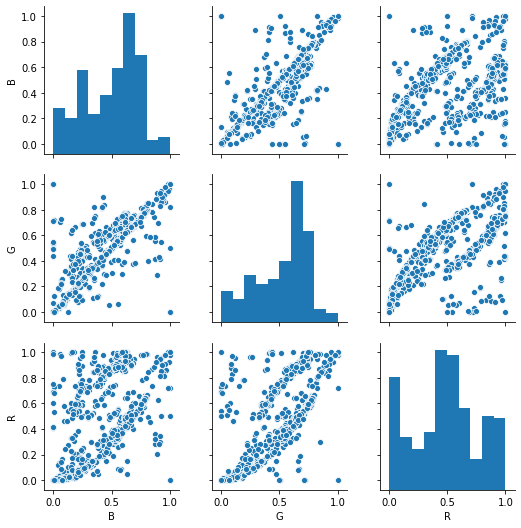

In [10]:
sns.pairplot(onlybgr)

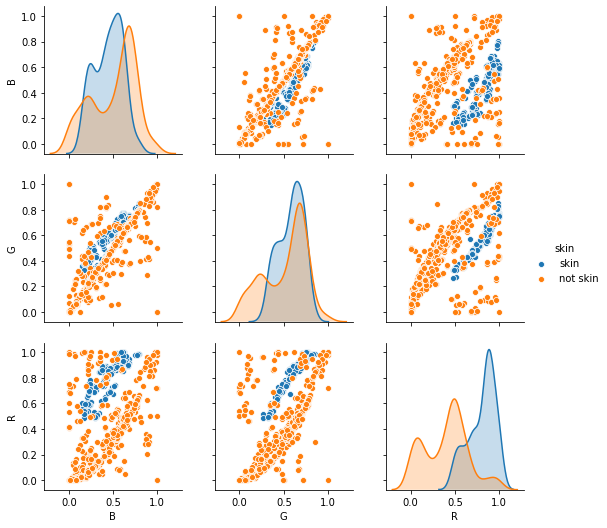

In [11]:
sample_ = sample.copy()
sample_['skin'] = sample.skin.apply(lambda x:{1:'skin',0:'not skin'}.get(x))
sns.pairplot(sample_, hue="skin")
# sample

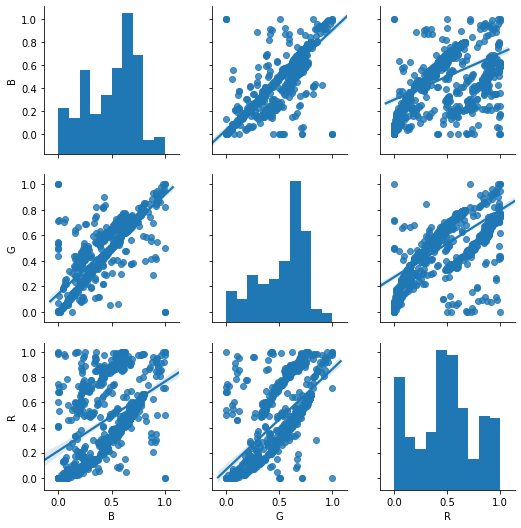

In [12]:
sns.pairplot(onlybgr, kind="reg")

In [13]:
# Lets see how many 0s and 1s
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

## SPLIT DATA INTO 5 CROSS - VALIDATION

In [14]:
x = feature.values
y = label.values

In [15]:
# We will keep fix test and take 5 cross validation set
# so we will have five different data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [16]:
#Lets see the size of xtrain, xtest
len(xtrain),len(xtest)

(196045, 49012)

In [17]:
# 5 Fold Split
# First merge xtrain and ytrain so that we can easily divide into 5 chunks

data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

((196045, 3), (196045, 1), (196045, 4))

In [18]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [19]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [20]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]
    

In [21]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [22]:
writepickle(datadict,'data.pkl')

## Now You Can Read This Pickle File And Use In Your Project

In [23]:
data = readpickle('data.pkl')

## How to access data
    Example : Access fold1 data

In [24]:
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']

In [25]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [26]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [27]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

<h1 style="color:green">!!!!!!!!!! NOTES !!!!!!!!!!</h1>

    This walkthrough is just to make your life easier
    If you want to use your own ways of doing data processing it is fine
    You can continue your assignment right-away from below or setup 
    a project like assignment 1. You can use any library you want

<h1 style="color:red">!!!!!!!!!! WARNING !!!!!!!!!!</h1>

    1. DO NOT SUBMIT .DOCX FILE
    2. NAME YOUR FILE IN FOLLOWING MANNER net_id_homework_2.pdf
    3. SUBMIT BOTH ASSIGNMENT(OPENED) AND YOUR DROPBOX
    4. YOUR REPORT SHOULD CONTAIN LINK TO YOUR GITHUB 
    5. ADD COMMENTS TO INCREASE READIBILITY IN YOUR CODE

### Now use above dataset to complete following work

# Assignment 2
    You can use any libraires you want, but choose python as your platform
    
    1. Implement Logistic Regression on this 5 fold data
    2. Report Test Accuracy, Val Accuracy on each fold
       Follow following format
       ________________________
       
            |  ACCURACY   
       FOLD | VAL | TEST  
       ________________________
            |     |
       1    |  0.917391 |  0.917653
       2    |  0.017519 |  0.91749
       3    |  0.917442 |  0.917347
       4    |  0.917646 |  0.918081
       5    |  0.917621 |  0.917775
       ________________________
       AVG  |  0.917524 |  0.917669
       
    3. Report Visualization
    
    NOTE :  You must submit two things
            First : A pdf report with following explanation
                    - What tools you used and why?
                    - Metrics as explained in (2)
                    - Visualization/Graph
                    - Conclude your experiment
                    - Add a github repo as report

            Second : A github repo
    

In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


class Logistic_Regression:
    def __init__(self, l_rate=1, alpha=0.1, tol = 1e-3, verb=False):
        """
        Constructor.
        
        l_rate: step for gradient descent (float)
        tol: tolerance for stoping gradient descent criteria (float)
        varb: display loss (bool)
        """
        self.l_rate = l_rate
        self.tol = tol
        self.alpha = alpha
        self.verb = verb

    def sigmoid(self, X):
        """
        Calculate sigmoid.
        
        X: vector of shape (n_samples, n_features) (np.array)
        """
        z = X.dot(self.w)
        return 1.0 / (1.0 + np.exp(-z))
    
    def get_norm(self):
        norm = 2 * self.alpha * self.w
        norm[0] = 0
        return norm
    
    def get_gradient(self, X, y):
        """
        Compute gradient for coefficions.
        
        X: vector of shape (n_samples, n_features) (np.array)
        y: vector of shape (n_samples, 1) (np.array)
        """
        # get sigmoid
        yhat = self.sigmoid(X)
        # compute gradient of vector of parameters
        derivative = np.dot(X.T, (yhat - y)) / X.shape[0] + self.get_norm() / X.shape[0]
        return derivative
    
    def gradient_descent(self, X, y, i):
        """
        Update coefficions, make gradient step. 
        
        X: vector of shape (n_samples, n_features) (np.array)
        y: vector of shape (n_samples, 1) (np.array)
        i: number of iteration epoch (int)
        """
        # get gradient
        derivative = self.get_gradient(X, y)
        # update parameters with step size depend on iteration number (step sizze decrease)
        self.w -= self.l_rate * derivative
    
        
    def loss(self, X, y):
        """
        Compute the cost function for all the training samples
        
        
        X: vector of shape (n_samples, n_features) (np.array)
        y: vector of shape (n_samples, 1) (np.array)
        """
        norm = self.alpha * self.w[1:].T.dot(self.w[1:])
        total_cost = (1 / X.shape[0]) * np.sum(
            -y * np.log(self.sigmoid(X)) - (1 - y) * np.log(
                1 - self.sigmoid(X))) + (1 / X.shape[0]) * norm
        return total_cost
    
    def fit(self, X, y):
        """
        Train model.
        
        X: vector of shape (n_samples, n_features) (np.array)
        y: vector of shape (n_samples, 1) (np.array)
        """
        # initialize parameters
        self.w = np.zeros((X.shape[1], 1))
        converged = False
        i = 1
        while  not converged:
            # make gradient step and update parameters
            self.gradient_descent(X, y, i)
            gradient = self.get_gradient(X, y)
            # if squared norm of gradients is less than tolerance, stop training
            if np.linalg.norm(gradient) < self.tol:
                converged = True 
            # if parameter verb is True, each 100th epoch of traning display loss 
            if self.verb:
                if i % 100 == 0:
                    loss = self.loss(X, y).flatten()[0]
                    print('Iteration number {}, loss: {}'.format(i, loss))
                    clear_output(wait=True)
            i += 1

    def predict(self, X):
        """
        Return prediction.
        
        X: vector of shape (n_samples, n_features) (np.array)
        """
        yhat = self.sigmoid(X)
        return np.where(yhat >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        """
        Return decision function
        
        X: vector of shape (n_samples, n_features) (np.array)        
        """
        yhat = self.sigmoid(X)
        return yhat

In [57]:
def roc_auc_score_curve(model, X, y,X_test, Y_test, type_1=None, type_2=None):
    """
    Compute auc score, plot roc-auc curve.
    
    X: vector of shape (n_samples, n_features) (np.array)
    y: vector of shape (n_samples, 1) (np.array)
    type_: label (for test or train set) (str)
    """
    # get scores of prediction 
    y_score = model.predict_proba(X)
    y_score_test = model.predict_proba(X_test)
    # compute false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, y_score)
    fpr_test, tpr_test, _ = roc_curve(y, y_score)
    # compute auc score
    roc_auc = auc(fpr, tpr)
    roc_auc_test = auc(fpr_test, tpr_test)
    # plot graph
    plt.figure(figsize=(8, 8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f}) on {} set'.format(roc_auc, type_1))
    plt.plot(fpr, tpr, lw=3, linestyle=':', label='ROC curve (area = {:0.2f}) on {} set'.format(roc_auc, type_2))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.tight_layout()
      
def get_scores(model, X, y, type_=None):
    """
    Represent models performance.

    model: model to examine
    X: vector of shape (n_samples, n_features) (np.array)
    y: vector of shape (n_samples, 1) (np.array)
    type_: label (for test or train set) (str)
    """
    # get prediction
    prediction = model.predict(X)
    # calculate confusion matrix on results
    conf_matrix = confusion_matrix(y, prediction)
    # plot confusion matrix
    plt.figure()
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion matrix LogReg on {} set'.format(type_))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    # print classification report
    print('Classification report for {} set'.format(type_))
    print(classification_report(y, prediction))
    
def get_accuracy(y, yhat):
    """
    Compute accuracy score.

    y: vector of shape (n_samples, 1) valid classes (np.array)
    yhat: vector of shape (n_samples, 1) predicted classes (np.array)
    """
    return np.mean(y == yhat)

def get_fold(data, i):
    """
    Return fold number i .
    
    data: dictionary of 5 folds with train, validation and test sets
    i: number of fold (int)
    """
    fold = data['fold{}'.format(i)]
    fold_train = fold['train']
    fold_val = fold1['val']
    fold_test = fold1['test']
    xtrain, ytrain = fold_train['x'],fold_train['y']
    xval, yval = fold_val['x'], fold_val['y']
    xtest, ytest = fold_test['x'],fold_test['y']
    return xtrain, ytrain, xval, yval, xtest, ytest

def fit_intercept(x):
    """
    Return matrix x fith new column with ones.
    
    X: vector of shape (n_samples, n_features) (np.array)
    """
    return np.insert(x, 0, 1, axis=1)

In [58]:
def cross_val(data, i):
    """
    Cross-validation prosidure.
    
    data: dictionary of 5 folds with train, validation and test sets
    i: number of fold (int)
    """
    # get train, validation and test sets of fold number 'i'
    x_train, y_train, x_val, y_val, x_test, y_test = get_fold(data, i)
    # add ones for intercept term
    x_train = fit_intercept(x_train)
    x_val = fit_intercept(x_val)
    x_test = fit_intercept(x_test)
    # create and train LogisticRegresion model
    model = Logistic_Regression(verb=True)
    model.fit(x_train, y_train)
    # get predictions for train, validation and test sets
    yval_predict = model.predict(x_val)
    ytest_predict = model.predict(x_test)
    ytrain_predict = model.predict(x_train)
    # calculate accuracies
    accuracy_val = get_accuracy(y_val, yval_predict)
    accuracy_test = get_accuracy(y_test, ytest_predict)
    accuracy_train = get_accuracy(y_train, ytrain_predict)
    return accuracy_val, accuracy_test, accuracy_train


In [59]:
# create lists for accuracies of results of logistic regression on each fold 
accuracy_val = []
accuracy_test = []
accuracy_train = []

In [60]:
# calculate results for 1 fold
acc_val_1, acc_test_1, acc_train_1 = cross_val(data, 1)
accuracy_val.append(acc_val_1)
accuracy_test.append(acc_test_1)
accuracy_train.append(acc_train_1)

Iteration number 1800, loss: 0.24742520772947735


In [61]:
# calculate results for 2 fold
acc_val_2, acc_test_2,  acc_train_2 = cross_val(data, 2)
accuracy_val.append(acc_val_2)
accuracy_test.append(acc_test_2)
accuracy_train.append(acc_train_2)

Iteration number 1900, loss: 0.24667041204016976


In [62]:
# calculate results for 3 fold
acc_val_3, acc_test_3,  acc_train_3 = cross_val(data, 3)
accuracy_val.append(acc_val_3)
accuracy_test.append(acc_test_3)
accuracy_train.append(acc_train_3)

Iteration number 1800, loss: 0.24816155717487182


In [63]:
# calculate results for 4 fold
acc_val_4, acc_test_4,  acc_train_4 = cross_val(data, 4)
accuracy_val.append(acc_val_4)
accuracy_test.append(acc_test_4)
accuracy_train.append(acc_train_4)

Iteration number 1900, loss: 0.2463634098696759


In [64]:
# calculate results for 5 fold
acc_val_5, acc_test_5,  acc_train_5 = cross_val(data, 5)
accuracy_val.append(acc_val_5)
accuracy_test.append(acc_test_5)
accuracy_train.append(acc_train_5)

Iteration number 1900, loss: 0.24697691890216542


In [74]:
def print_accuracy_report(acc_val, acc_test):
    """
    Print accuracy.
    
    acc_val: list of validation accuracies of each fold
    acc_test: list of test accuracies of each fold
    """
    print('________________________')
    print()
    print('     |  ACCURACY')
    print('{:<} |{:^9}|{:^9}'.format('FOLD', 'VAL', 'TEST'))
    print()
    print('________________________')
    print('{:<5}|{:^9}|{:^9}'.format('', '', ''))
    for i, (v, t) in enumerate(zip(acc_val, acc_test), start=1):
        print('{:<5}|{:<9}|{:<9}'.format(i, np.round(v, 6), np.round(t, 6)))
    print()
    print('________________________')
    print('{:<5}|{:<9}|{:<9}'.format('AVG', np.round(np.mean(acc_val), 6), np.round(np.mean(acc_test), 6)))

In [75]:
print_accuracy_report(accuracy_val, accuracy_test)

________________________

     |  ACCURACY
FOLD |   VAL   |  TEST   

________________________
     |         |         
1    |0.917391 |0.917653 
2    |0.917519 |0.91749  
3    |0.917442 |0.917347 
4    |0.917646 |0.918081 
5    |0.917621 |0.917775 

________________________
AVG  |0.917524 |0.917669 


In [67]:
print(np.mean(accuracy_train))

0.9176235048075696


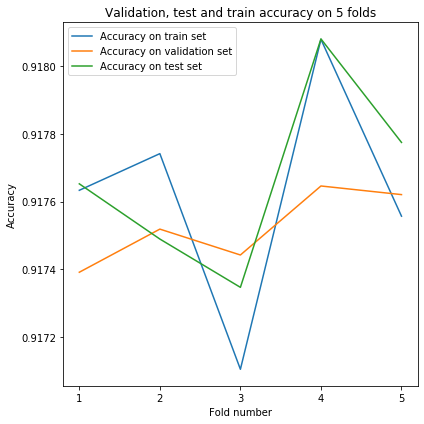

In [68]:
# plot train, validation abd test accuracies
plt.figure(figsize=(6, 6))
plt.plot(list(range(1,6)), accuracy_train, label='Accuracy on train set')
plt.plot(list(range(1,6)), accuracy_val, label='Accuracy on validation set')
plt.plot(list(range(1,6)), accuracy_test, label='Accuracy on test set')
plt.title('Validation, test and train accuracy on 5 folds')
plt.xticks(list(range(1,6)))
plt.xlabel('Fold number')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend();

In [69]:
# add 1 for intercept term to train and test sets
xtrain_ = np.insert(xtrain, 0, 1, axis=1)
xtest_ = np.insert(xtest, 0, 1, axis=1)
# create and train logistic regression on whole train set
model = Logistic_Regression()
model.fit(xtrain_, ytrain)

In [70]:
# get and print train and test accuracy
acc_train = get_accuracy(ytrain, model.predict(xtrain_))
acc_test = get_accuracy(ytest, model.predict(xtest_))
print('Train accuracy: {}, test accuracy: {}'.format (acc_train, acc_test))

Train accuracy: 0.9176337065469663, test accuracy: 0.9176528197176201


c:\python37\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


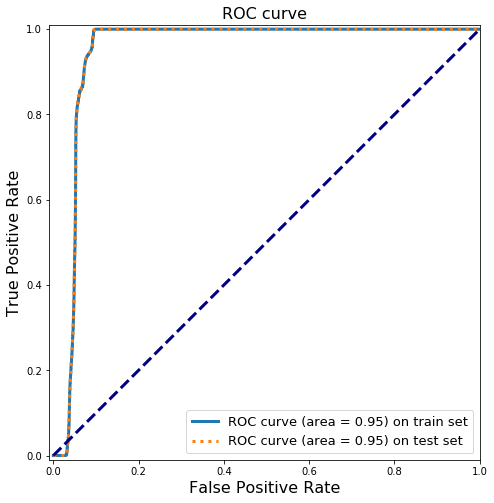

<Figure size 432x288 with 0 Axes>

In [71]:
# plot roc-auc curve for train set
roc_auc_score_curve(model, xtrain_, ytrain, xtest_, ytest, type_1='train', type_2='test')

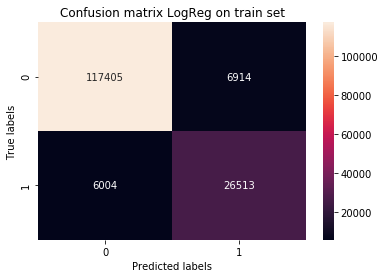

Classification report for train set
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95    124319
         1.0       0.79      0.82      0.80     32517

    accuracy                           0.92    156836
   macro avg       0.87      0.88      0.88    156836
weighted avg       0.92      0.92      0.92    156836



In [72]:
# confusion matrix and classification report for train set
get_scores(model, xtrain_, ytrain, type_='train')

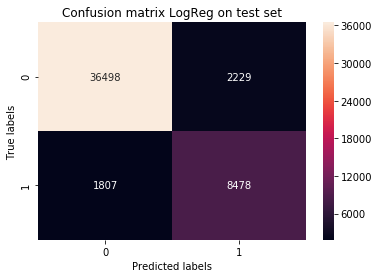

Classification report for test set
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     38727
           1       0.79      0.82      0.81     10285

    accuracy                           0.92     49012
   macro avg       0.87      0.88      0.88     49012
weighted avg       0.92      0.92      0.92     49012



In [73]:
# confusion matrix and classification report for est set
get_scores(model, xtest_, ytest, type_='test')